In [29]:
#ワーキングディレクトリーの設定
setwd('C:/Users/Masahiro Kasahara/Desktop/Research')
getwd()

[1] "C:/Users/Masahiro Kasahara/Desktop/Research"

In [32]:
#S&P100のデータセットの編集・読み込み

#開始日と終了日を指定
start <- '2009-12-16' #開始日：形式'2010-01-01'
end <- '2020-09-16' #終了日：形式'2010-01-01'

#データセットの編集・読み込み
files <- dir('dataset/original/sp100_2015/',rec=TRUE)
n <- length(files)
fail_list <- c()
for(i in 1:n){
    tryCatch({
        name <- files[i]
        df <- read.csv(paste('dataset/original/sp100_2015/',name,sep=''))
        start_date <- which(df$Date == start) #開始日を指定
        end_date <- which(df$Date == end) #終了日を指定
        df <- df[start_date:end_date,]
        write.csv(df, paste('dataset/sp100_2015/',name,sep=''))},
    error = function(e){
        fail_list <- c(fail_list,name) #失敗した銘柄リストの作成
        print(paste('Fail in ',name,sep=''))} 
    )
}

[1] "Fail in ABBV.csv"
[1] "Fail in DOW.csv"
[1] "Fail in EMC.csv"
[1] "Fail in FB.csv"
[1] "Fail in FOXA.csv"
[1] "Fail in GM.csv"
[1] "Fail in MON.csv"
[1] "Fail in TWX.csv"


In [45]:
#Target,DFF,DTB6のデータセットの編集

#開始日と終了日を指定
start_target <- '2009/12/16' #開始日：形式'2010/1/1'
end_target <- '2020/9/16' #終了日：形式'2010/1/1'
start <- '2009-12-16' #開始日：形式'2010-01-01'
end <- '2020-09-16' #終了日：形式'2010-01-01'

#Target
name <- 'Target'
df <- read.csv(paste('dataset/original/',name,'.csv',sep=''))
start_date <- which(df$date == start_target) #開始日を指定
end_date <- which(df$date == end_target) #終了日を指定
target <- df[start_date:end_date,]
print(name);head(target)

#DFF
name <- 'DFF'
df <- read.csv(paste('dataset/original/',name,'.csv',sep=''))
start_date <- which(df$DATE == start) #開始日を指定
end_date <- which(df$DATE == end) #終了日を指定
effective <- df[start_date:end_date,]
print(name);head(effective)

#DTB6
name <- 'DTB6'
df <- read.csv(paste('dataset/original/',name,'.csv',sep=''))
start_date <- which(df$DATE == start) #開始日を指定
end_date <- which(df$DATE == end) #終了日を指定
tb6m <- df[start_date:end_date,]
print(name);head(tb6m)

[1] "Target"


,date,rate_min,rate_max,rate_discount,temporary
,<chr>,<dbl>,<dbl>,<dbl>,<int>
76,2008/8/5,NA,1.00,2.25,0
77,2008/9/16,NA,2.00,2.25,0
78,2008/10/8,NA,1.50,1.75,1
79,2008/10/29,NA,1.00,1.25,0
80,2008/12/16,0,0.25,0.50,0
81,2009/1/28,0,0.25,0.50,0


[1] "DFF"


,DATE,DFF
,<chr>,<dbl>
3140,2008-08-05,1.97
3141,2008-08-06,2.01
3142,2008-08-07,1.96
3143,2008-08-08,2.01
3144,2008-08-09,2.01
3145,2008-08-10,2.01


[1] "DTB6"


,DATE,DTB6
,<chr>,<dbl>
2242,2008-08-05,1.92
2243,2008-08-06,1.87
2244,2008-08-07,1.87
2245,2008-08-08,1.90
2246,2008-08-11,2.00
2247,2008-08-12,2.00


In [47]:
#Targetデータセット(日足)を作成
#effectiveのデータセットを使用してtargetデータセット(日足)を作成
date1<-effective[,1] 
target0<-target[which(target[,5]==0),] #予定されたFOMC日程を抽出
date2<-target0[,1]

#ミーティング日程のindex番号ベクトルを作成
meeting<-vector("numeric",length(date2))
for(i in 1:(length(date2))){
  tmpi<-which(as.Date(date1)==as.Date(date2[i])) #ベクトル番号を取得
  meeting[i]<-tmpi
}

#Targetデータセット(日足)を作成
target1<-effective
k<-1
for(i in 2:nrow(target)){
  target1[k:(which(as.Date(effective[,1])==as.Date(target[i,1]))-1),2]<-rep(target[i-1,3],which(as.Date(effective[,1])==as.Date(target[i,1]))-k)
  k<-which(as.Date(effective[,1])==as.Date(target[i,1]))
}

#データのサイズを統一化
target2 <- subset(target1,as.Date(target1[,1]) %in%　as.Date(tb6m[,1]))
effective2 <- subset(effective,as.Date(effective[,1]) %in%　as.Date(tb6m[,1]))
tb6m2 <- subset(tb6m,as.Date(tb6m[,1]) %in%　as.Date(effective[,1]))

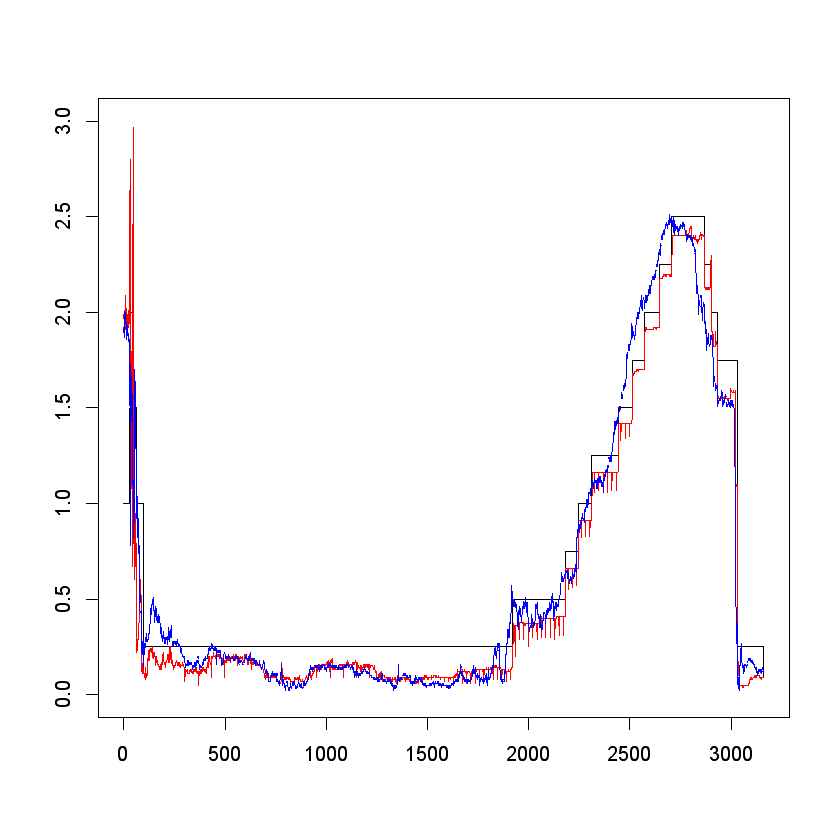

In [48]:
#データのプロット
plot(target2[,2],ylim=c(0,3),t="l",xlab="",ylab="")
par(new=T)
plot(effective2[,2],ylim=c(0,3),col="red",t="l",xlab="",ylab="")
par(new=T)
plot(tb6m2[,2],ylim=c(0,3),col="blue",t="l",xlab="",ylab="")

In [37]:
#対数収益率(実行金利,6カ月国債)
delta<-log(as.numeric(effective2[,2])/as.numeric(tb6m2[,2]))

In [38]:
# Petersen Function(2)
lam<-10
L1<-15
nm<-length(meeting)
theta<-vector("numeric",nm-2)
k <- 1
for(i in 1:(nm-2)){
  fomc<-as.Date(target0[i+1,1])
  tmpi<-which(as.Date(effective2[,1])==fomc)
  theta[k]<-sum(delta[(tmpi-L1):(tmpi-1)]*exp(-(L1:1)/lam))/sum(exp(-(L1:1)/lam))
  k <- k + 1
}

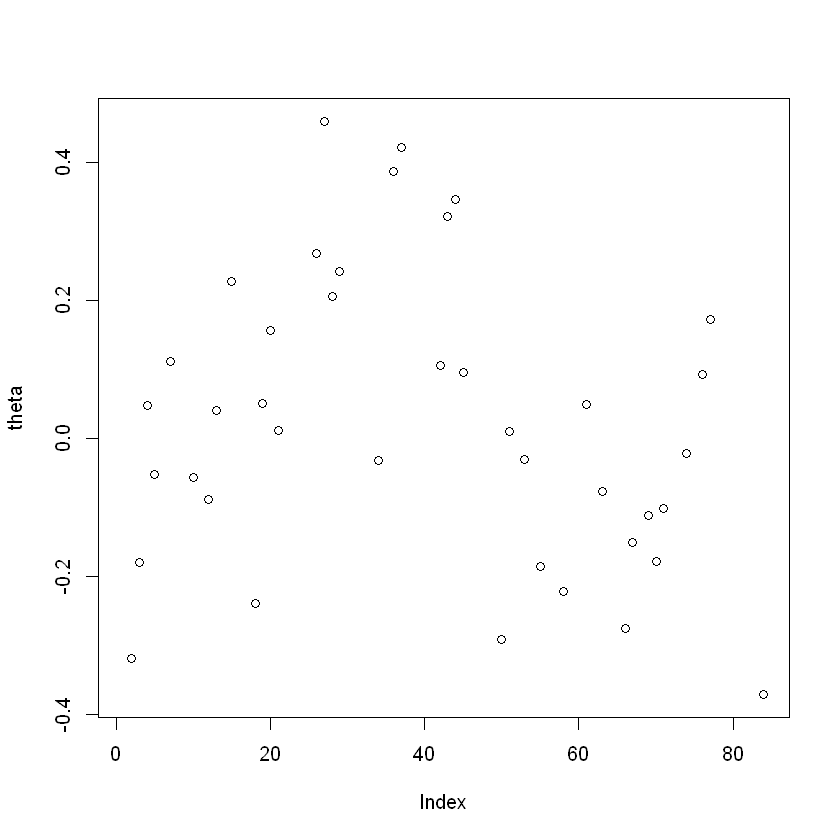

In [39]:
plot(theta)

In [40]:
# Petersen Function(4)
files<-dir("dataset/sp100_2015",rec=T)
n<-length(files)
nm<-length(meeting)

v_ave<-matrix(0,n,21)
v_ave2<-vector("numeric",21)
weight<-0
for(stock in 1:n){
  filename<-paste("dataset/sp100_2015/",files[stock],sep="")
  tmp<-read.csv(filename)
  tmp<-tmp[,2:8]
  tmp<-subset(tmp, as.Date(tmp[,1]) %in%　as.Date(tb6m[,1]))
  r<-matrix(0,nm-2,21)
  r_ave<-vector("numeric",nm-2)
  Phi<-matrix(0,nm-2,21)
  Phi_ave<-vector("numeric",nm-2)
  phi<-vector("numeric",nm-2)
  for(i in 1:(nm-2)){
    fomc<-as.Date(target0[i+1,1])
    tmpi<-which(as.Date(tmp[,1])==fomc)
    r[i,] <- log(tmp[(tmpi-10):(tmpi+10),2]/tmp[(tmpi-10):(tmpi+10),3])
    r_ave[i] <- mean(log(tmp[(tmpi-20):(tmpi+20),2]/tmp[(tmpi-20):(tmpi+20),3]))
    r[i,]<-r[i,]/r_ave[i]
    Phi[i,] <- tmp[(tmpi-10):(tmpi+10),6]
    Phi_ave[i] <- mean(tmp[(tmpi-20):(tmpi+20),6])
    phi[i]<-tmp[tmpi,6]/Phi_ave[i]
  }
  v_ave[stock,]<-as.vector(phi%*%r/sum(phi))
  v_ave2<-v_ave2+as.vector(phi%*%r)
  weight<-weight+sum(phi)
}
v_ave2<-v_ave2/weight

In [ ]:
#欠損値の確認
#取引量が0の期間が計算上の問題となっていた。
print(filename)
print('tmp');head(tmp);tail(tmp)
print('r');head(r);tail(tmp)
print('r_ave');head(r_ave);tail(r_ave)
print('Phi');head(Phi);tail(Phi)
print('phi');head(phi);tail(phi)
print('fomc');fomc
print('tmpi');tmpi

In [ ]:
#欠損値の確認→EP
#取引量が0の期間が計算上の問題となっていた。
fail <- files[which(is.nan(v_ave[,1]) == TRUE)] #欠損値が生じている銘柄を特定
print(fail)

tmp <- read.csv(paste("dataset/sp100_2015/",fail,sep="")) #欠損値が生じている銘柄の読み込み
tmp <- tmp[,2:8]
head(tmp);tail(tmp)

which(tmp[,6]==0) #取引量が0の期間を特定

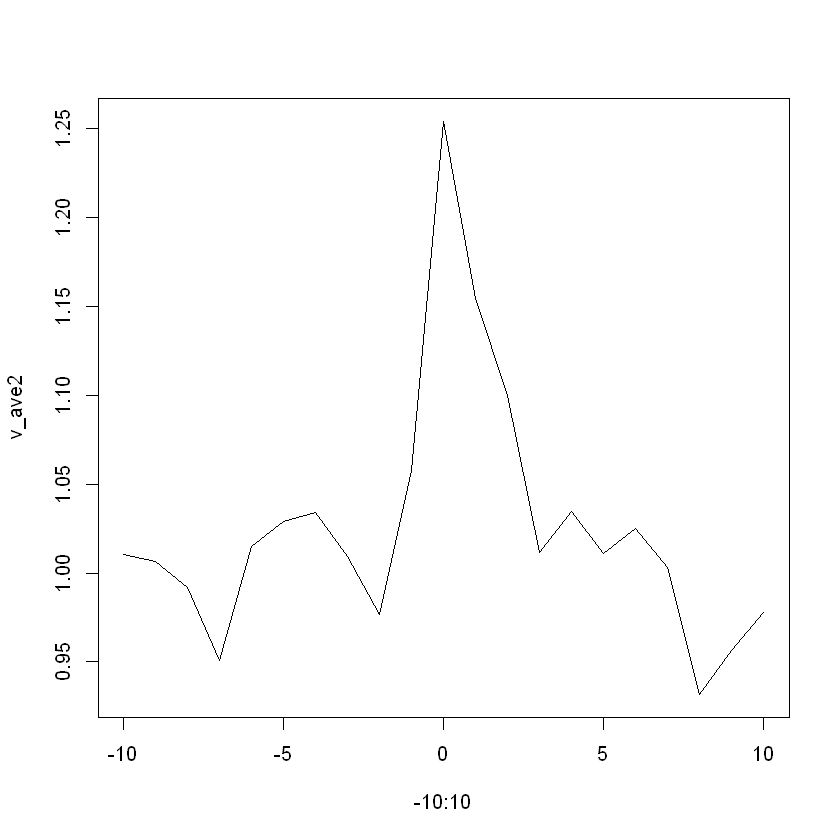

In [41]:
#Fig.2 Average daily volatility trend defined in Eq.(4)
plot(-10:10,v_ave2,t="l")

In [42]:
# Petersen Function(5)
files<-dir("dataset/sp100_2015",rec=T)
n<-length(files)
nm<-length(meeting)

tm<-matrix(0,n,nm-2)
tm2<-matrix(0,n,nm-2)
v_ave<-vector("numeric",nm-2)
weight<-vector("numeric",nm-2)
r<-vector("numeric",nm-2)
r_ave<-vector("numeric",nm-2)
phi<-vector("numeric",nm-2)
for(stock in 1:n){
  filename<-paste("dataset/sp100_2015/",files[stock],sep="")
  tmp<-read.csv(filename)
  for(i in 1:(nm-2)){
    tmp<-read.csv(filename)
    tmp<-tmp[,2:8]
    tmp<-subset(tmp, as.Date(tmp[,1]) %in%　as.Date(tb6m[,1]))
    fomc<-as.Date(target0[i+1,1])
    tmpi<-which(as.Date(tmp[,1])==fomc)
    r[i] <- log(tmp[tmpi,2]/tmp[tmpi,3])
    r_ave[i] <- mean( log(tmp[(tmpi-20):(tmpi+20),2]/tmp[(tmpi-20):(tmpi+20),3]))
    r[i]<-r[i]/r_ave[i]
    phi[i]<-tmp[tmpi,6]/mean(tmp[,6])
    tm[stock,i]<-r[i]
    tm2[stock,i]<-phi[i]
    v_ave[i]<-v_ave[i]+phi[i]*r[i]
    weight[i]<-weight[i]+phi[i]
  }
}
v_ave<-v_ave/weight

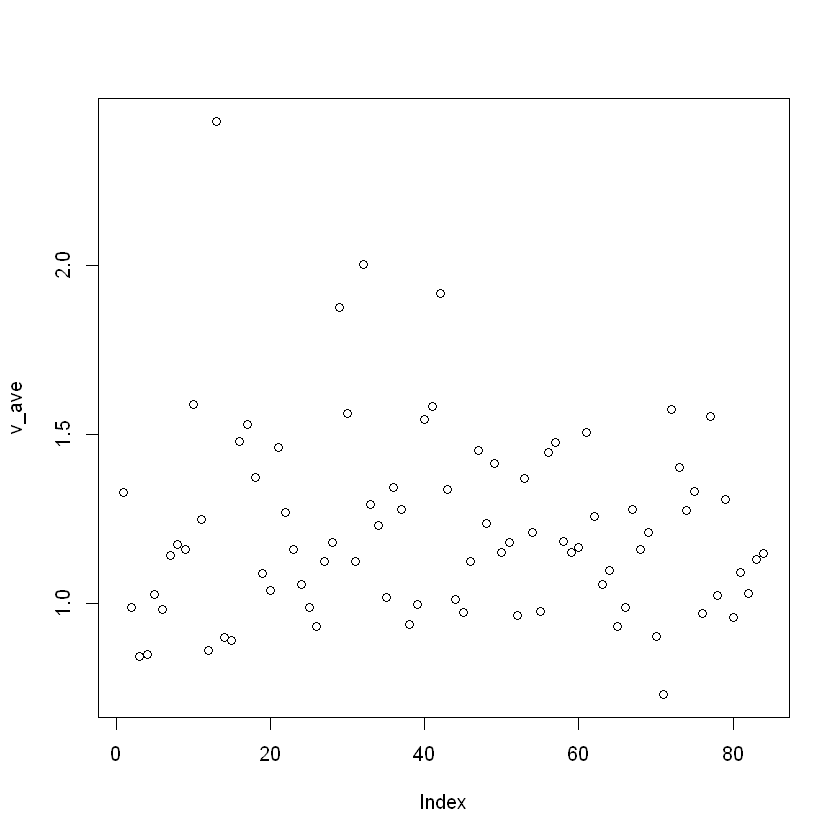

In [43]:
plot(v_ave)


Call:
lm(formula = v_ave[v_ave < 3] ~ theta[v_ave < 3])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44268 -0.21655 -0.05897  0.09123  1.21620 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.20088    0.05243  22.905   <2e-16 ***
theta[v_ave < 3]  0.27955    0.24976   1.119     0.27    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3299 on 38 degrees of freedom
  (44 observations deleted due to missingness)
Multiple R-squared:  0.03192,	Adjusted R-squared:  0.00644 
F-statistic: 1.253 on 1 and 38 DF,  p-value: 0.27


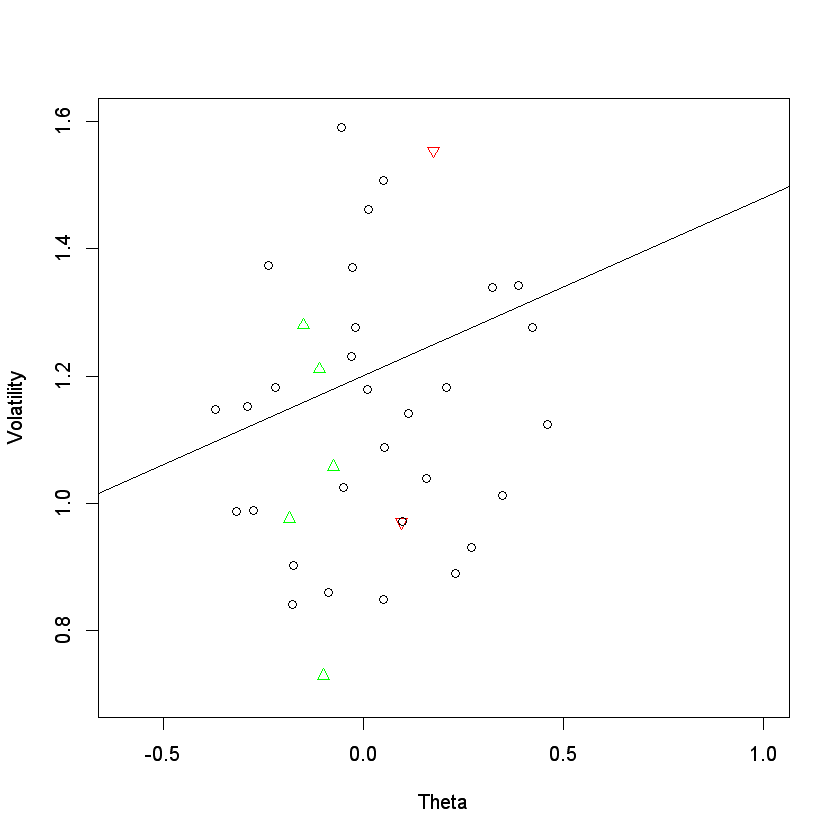

In [44]:
sign<-diff(target0[2:(nm),3])

res<-lm(v_ave[v_ave<3]~theta[v_ave<3])
summary(res)

#ボラティリティ(目標金利DOWN)
plot(theta[v_ave<3&sign<0],v_ave[v_ave<3&sign<0],
     col="red",pch=6,xlim=c(-0.6,1.0),ylim=c(0.7,1.6),
     xlab="Theta",ylab="Volatility")
par(new=T)

#ボラティリティ(目標金利Equal)
plot(theta[v_ave<3&sign==0],v_ave[v_ave<3&sign==0],
     col="black",pch=1,xlim=c(-0.6,1.0),ylim=c(0.7,1.6),
     xlab="Theta",ylab="Volatility")
par(new=T)

#ボラティリティ(目標金利UP)
plot(theta[v_ave<3&sign>0],v_ave[v_ave<3&sign>0],
     col="green",pch=2,xlim=c(-0.6,1.0),ylim=c(0.7,1.6),
     xlab="Theta",ylab="Volatility")

abline(res) #回帰直線のプロット